# **Part 01: Data Preprocessing**

Dataset Link: https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers

## Importing libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data exploration

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [ ]:
df.select_dtypes(include='number').columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## Dealing with missing data

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isna().values.sum()

0

In [ ]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


## Encode the categorical data

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [ ]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [ ]:
df.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
# Set numeric_only to True to only calculate the mean of numeric columns
df.groupby('Geography').mean(numeric_only=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [ ]:
df.groupby('Gender').mean(numeric_only=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = pd.get_dummies(data=df, columns=['Geography', 'Gender'], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


## Countplot

<ipython-input-88-5eb29083e246>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Exited'], palette="deep")


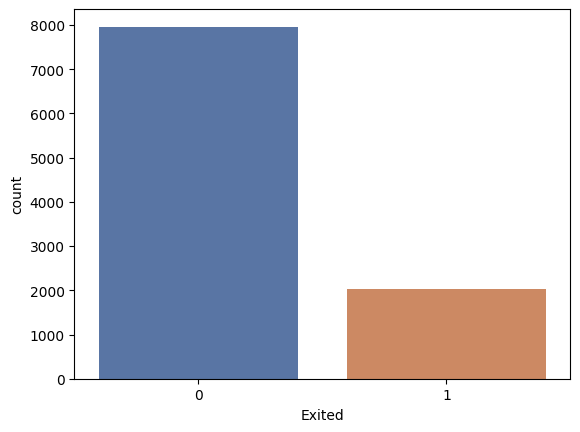

In [ ]:
# 0 : Retained with the bank and 1 : left the bank

sns.countplot(x=df['Exited'], palette="deep")
plt.show()

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


## Corelation matrix and heatmap

In [ ]:
df2 = df.drop(columns=['Exited'])
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


<Axes: title={'center': 'Correlation with Exited'}>

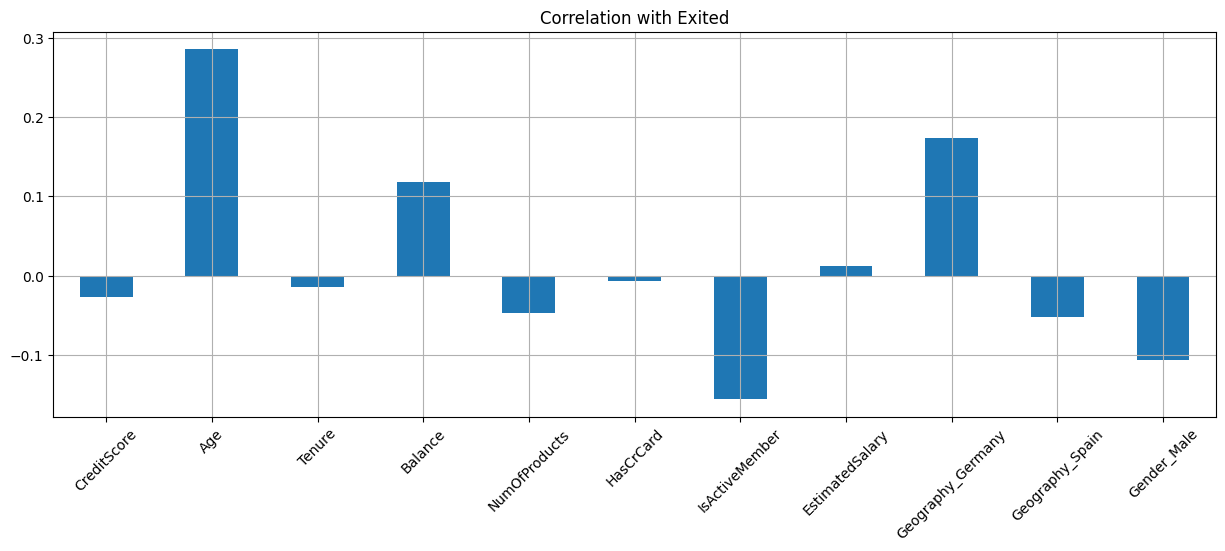

In [ ]:
df2.corrwith(df['Exited']).plot.bar(
    figsize = (15, 5), title = "Correlation with Exited", fontsize = 10,
    rot = 45, grid = True)

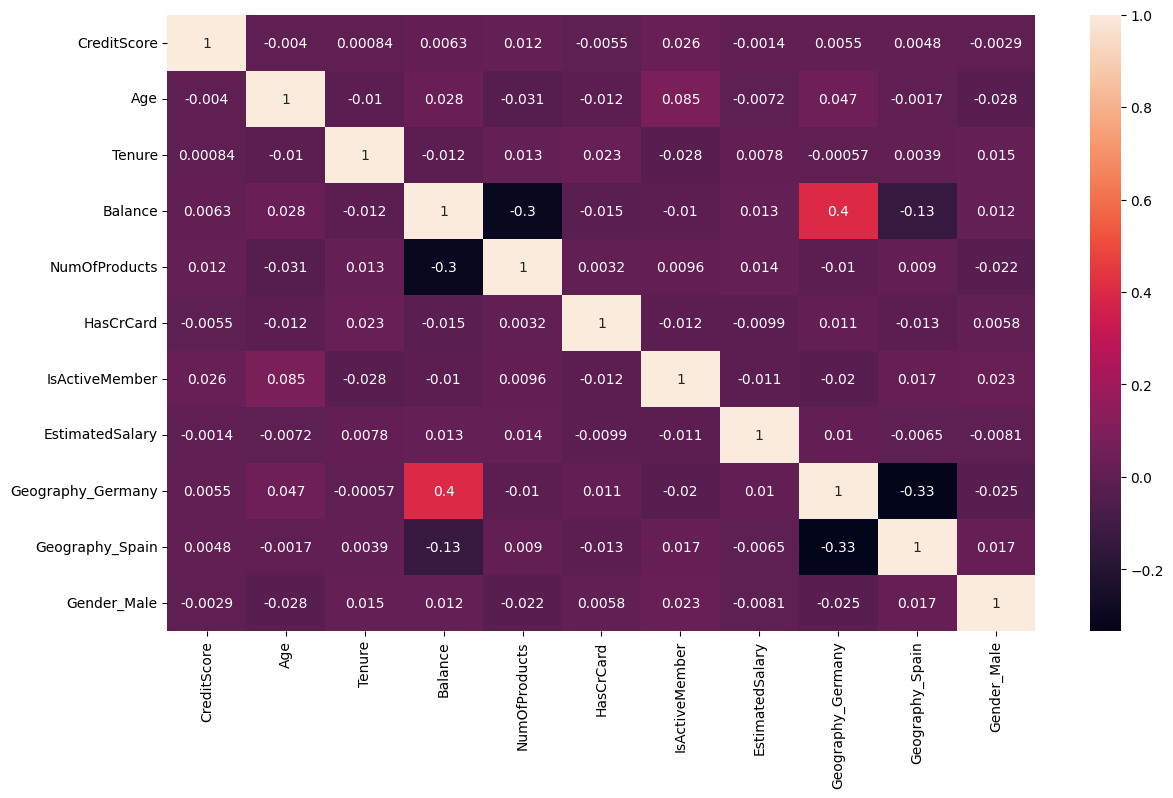

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(df2.corr(), annot=True)
plt.show()

## Split the dataset

In [ ]:
df.sample(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
2350,617,58,3,119024.75,2,1,0,35199.24,1,True,False,False
9880,584,42,3,137479.13,1,1,0,25669.10,0,True,False,True
6106,762,28,3,125155.83,2,1,1,106024.02,0,True,False,True


In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Part 02 : Model Building**

## 1) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

y_pred = classifier_lr.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)

In [ ]:
results = pd.DataFrame([['Logistic Regression', acc, rec, f1, pre]],
               columns = ['Model', 'Accuracy', 'Recall', 'F1 Score', 'Precision'])
results

,Model,Accuracy,Recall,F1 Score,Precision
0,Logistic Regression,0.811,0.237037,0.336842,0.581818


In [ ]:
confusion_matrix(y_test, y_pred)

array([[1526,   69],
       [ 309,   96]])

### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier_lr, X = X_train, y = y_train, cv = 10)

print("Accuracy is : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is : {:.2f} %".format(accuracies.std()*100))

Accuracy is : 80.84 %
Standard Deviation is : 0.88 %


## 2) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred =  classifier_rf.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1523,   72],
       [ 194,  211]])

In [ ]:
rf_results = pd.DataFrame([['Random Forest', acc, rec, f1, pre]],
               columns = ['Model', 'Accuracy', 'Recall', 'F1 Score', 'Precision'])
results = pd.concat([results, rf_results], ignore_index=True)
results

,Model,Accuracy,Recall,F1 Score,Precision
0,Logistic Regression,0.811,0.237037,0.336842,0.581818
1,Random Forest,0.867,0.520988,0.613372,0.745583


### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier_rf, X = X_train, y = y_train, cv = 10)

print("Accuracy is : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is : {:.2f} %".format(accuracies.std()*100))

Accuracy is : 85.96 %
Standard Deviation is : 1.02 %


## 3) XGBoost

In [ ]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier()
classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred =  classifier_xgb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1489,  106],
       [ 189,  216]])

In [ ]:
xgb_results = pd.DataFrame([['XGBoost', acc, rec, f1, pre]],
               columns = ['Model', 'Accuracy', 'Recall', 'F1 Score', 'Precision'])
results = pd.concat([results, xgb_results], ignore_index=True)
results

,Model,Accuracy,Recall,F1 Score,Precision
0,Logistic Regression,0.8110,0.237037,0.336842,0.581818
1,Random Forest,0.8670,0.520988,0.613372,0.745583
2,XGBoost,0.8525,0.533333,0.594223,0.670807


In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier_xgb, X = X_train, y = y_train, cv = 10)

print("Accuracy is : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is : {:.2f} %".format(accuracies.std()*100))

Accuracy is : 85.12 %
Standard Deviation is : 1.00 %


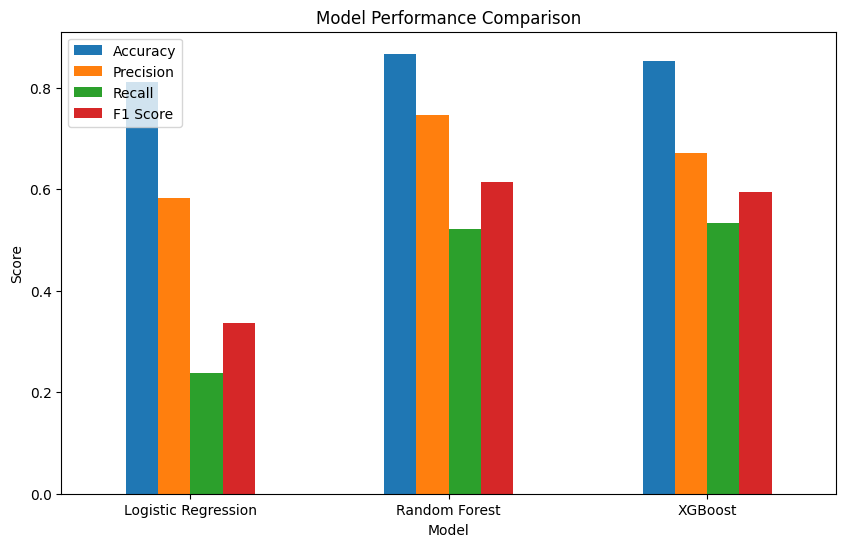

In [ ]:
# prompt: convert the below chart into something that will represent precesion, recall, f1-score and accuracy for each model

import matplotlib.pyplot as plt
# Create a bar plot
results.plot(x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1 Score'], kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()


# **Part 03: Randomized search to find the best parameters (XGBoost Classifier)**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# parameters = {
#     'n_estimators': [100, 200, 300, 400, 500, 700, 800],
#     'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
#     'learning_rate': [0.01, 0.1, 0.2, 0.05, 0.20, 0.30, 0.5, 0.8],
#     'min_child_weight': [1, 2, 3, 5, 7],
#     'gamma': [0, 0.1, 0.2, 0.3, 0.4],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.3, 0.4, 0.5, 0.8, 0.9, 1.0]
# }



parameters = {
    'n_estimators': [100, 200, 300, 400, 500, 700, 800, 1000, 1200, 1500],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 12, 15],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.05, 0.20, 0.30, 0.5, 0.8],
    'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 10],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'early_stopping_rounds': [5, 10, 15, 20]
}

In [ ]:
parameters

{'n_estimators': [100, 200, 300, 400, 500, 700, 800, 1000, 1200, 1500],
 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 12, 15],
 'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.05, 0.2, 0.3, 0.5, 0.8],
 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 10],
 'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
 'early_stopping_rounds': [5, 10, 15, 20]}

In [ ]:
random_search = RandomizedSearchCV(estimator=classifier_xgb,
                                   param_distributions=parameters, n_iter=5,
                                   scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

In [ ]:
random_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                                             1.0],
                                        'early_stopping_rounds': [5, 10, 15,
                                                                  20],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                  0.6, 0.7, 0.8, 0.9],
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                          0.05, 0.2, 0.3, 0.5,
                                                          0.8],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      12, 15],
                                        'min_child_weight': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 700, 800, 1000,
                                                         1200, 1500],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
random_search.best_params_

{'subsample': 0.6,
 'n_estimators': 1000,
 'min_child_weight': 5,
 'max_depth': 6,
 'learning_rate': 0.001,
 'gamma': 0.5,
 'early_stopping_rounds': 5,
 'colsample_bytree': 0.7}

In [ ]:
random_search.best_score_

0.8644271933451538

# **Part 04: Final Model (XGBoost Classifier)**

In [ ]:
classifier = XGBClassifier(verbosity = 1, subsample = 0.5, n_estimators = 700, min_child_weight = 2,
                           max_depth = 5, learning_rate = 0.01, gamma = 0.5, early_stopping_rounds = 20,
                          colsample_bytree = 0.4)

classifier.fit(X_train, y_train,eval_set=[(X_test, y_test)], verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=700, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1535,   60],
       [ 207,  198]])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)


xgb_results = pd.DataFrame([['XGBoost Final', acc, rec, f1, pre]],
               columns = ['Model', 'Accuracy', 'Recall', 'F1 Score', 'Precision'])
results = pd.concat([results, xgb_results], ignore_index=True)
results

,Model,Accuracy,Recall,F1 Score,Precision
0,Logistic Regression,0.8110,0.237037,0.336842,0.581818
1,Random Forest,0.8670,0.520988,0.613372,0.745583
2,XGBoost,0.8525,0.533333,0.594223,0.670807
3,XGBoost Final,0.8665,0.488889,0.597285,0.767442


# **part 05: predicting a single instance**

In [ ]:
df.tail(4)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True
9999,792,28,4,130142.79,1,1,0,38190.78,0,False,False,False


In [ ]:
single_instance = df.iloc[110].copy()
single_instance

,110
CreditScore,685
Age,30
Tenure,3
Balance,90536.81
NumOfProducts,1
HasCrCard,0
IsActiveMember,1
EstimatedSalary,63082.88
Exited,0
Geography_Germany,True


In [ ]:
single_instance.drop(labels=['Exited'], axis=0, inplace=True)

In [ ]:
single_instance = single_instance.values
single_instance

array([685, 30, 3, 90536.81, 1, 0, 1, 63082.88, True, False, True],
      dtype=object)

In [ ]:
classifier.predict(sc.transform([single_instance]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

**The model has predicted the correct label for the single instance which we provided**